In [2]:
# Generating simulated data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=3,
    cluster_std=0.5, shuffle=True, random_state=0)

import plotly.graph_objects as go
fig=go.Figure()
fig.add_trace(go.Scatter(x=X[:,0], y=X[:,1], mode='markers'))
fig.update_layout(width=600, height=500)
fig.show()

In [4]:
# K-means clustering
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='k-means++', n_init=10,
            max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

In [8]:
# Plotting results
fig=go.Figure()
fig.add_trace(go.Scatter(x=X[y_km == 0, 0], y=X[y_km == 0, 1],
    mode='markers', name='cluster1'))
fig.add_trace(go.Scatter(x=X[y_km == 1, 0], y=X[y_km == 1, 1],
    mode='markers', name='cluster2'))
fig.add_trace(go.Scatter(x=X[y_km == 2, 0], y=X[y_km == 2, 1],
    mode='markers', name='cluster3'))
fig.add_trace(go.Scatter(x=km.cluster_centers_[:, 0],
    y=km.cluster_centers_[:, 1], mode='markers', 
    marker=dict(size=12, colorscale='Viridis'), name='centroid'))
fig.show()

In [9]:
# Generating simulated data
import pandas as pd
import numpy as np
np.random.seed(123)
features = ['X', 'Y', 'Z']
id = ['ID0', 'ID1', 'ID2', 'ID3', 'ID4']
X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=features, index=id)
print(df)

            X         Y         Z
ID0  6.964692  2.861393  2.268515
ID1  5.513148  7.194690  4.231065
ID2  9.807642  6.848297  4.809319
ID3  3.921175  3.431780  7.290497
ID4  4.385722  0.596779  3.980443


In [10]:
# Agglomerative clustering with K=3
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3,
    affinity='euclidean', linkage='complete')
labels = agg.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 0 0 2 1]


In [11]:
# Agglomerative clustering with K=2
agg = AgglomerativeClustering(n_clusters=2,
    affinity='euclidean', linkage='complete')
labels = agg.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


In [12]:
# Generating simulated data
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [13]:
import plotly.express as px
fig=px.scatter(x=X[:,0], y=X[:,1])
fig.update_layout(width=500, height=380)
fig.show()

In [14]:
# K-means and Hierachical(Agglomerative) clustering
from sklearn.cluster import KMeans
# K-means++ clustering
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
from sklearn.cluster import AgglomerativeClustering
# Agglomerative clustering
ac = AgglomerativeClustering(n_clusters=2, linkage='complete')
y_ac = ac.fit_predict(X)

In [21]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig=make_subplots(rows=1, cols=2,
    subplot_titles=('K-means clustering', 'Agglomerative clustering'))
fig.add_trace(go.Scatter(x=X[y_km == 0, 0], y=X[y_km == 0, 1],
    mode='markers', name='cluster1'), row=1, col=1)
fig.add_trace(go.Scatter(x=X[y_km == 1, 0], y=X[y_km == 1, 1],
    mode='markers', name='cluster2'), row=1, col=1)
fig.add_trace(go.Scatter(x=X[y_ac == 0, 0], y=X[y_ac == 0, 1],
    mode='markers', name='cluster1'), row=1, col=2)
fig.add_trace(go.Scatter(x=X[y_ac == 1, 0], y=X[y_ac == 1, 1],
    mode='markers', name='cluster2'), row=1, col=2)
fig.update_layout(height=400, width=800,
    title_text='Clustering', title_x=0.5)
fig.show()

In [22]:
# DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
y_db = db.fit_predict(X)
fig=go.Figure()
fig.add_trace(go.Scatter(x=X[y_db==0,0], y=X[y_db==0,1],
    mode='markers', name='cluster1'))
fig.add_trace(go.Scatter(x=X[y_db==1,0], y=X[y_db==1,1],
    mode='markers', name='cluster2'))
fig.update_layout(width=500, height=380)
fig.show()
print(y_db[:5])

[ 0  1  1 -1  1]


In [26]:
#!pip install hdbscan
import hdbscan
hdb=hdbscan.HDBSCAN(min_samples=10)
y_hdb = hdb.fit_predict(X)

fig=go.Figure()
fig.add_trace(go.Scatter(x=X[y_hdb==0,0], y=X[y_hdb==0,1],
    mode='markers', name='cluster1'))
fig.add_trace(go.Scatter(x=X[y_hdb==1,0], y=X[y_hdb==1,1],
    mode='markers', name='cluster2'))
fig.update_layout(width=500, height=380)
fig.show()

<Axes: ylabel='$\\lambda$ value'>

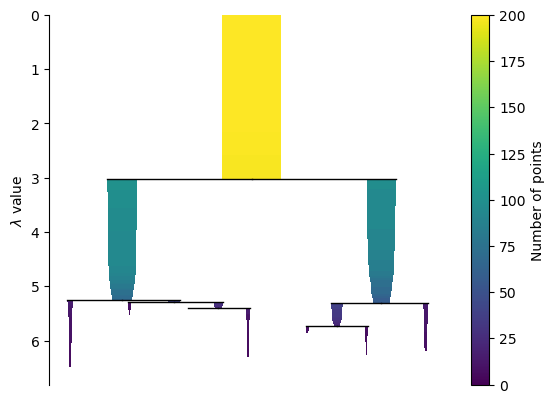

In [27]:
hdb.condensed_tree_.plot()

<Axes: ylabel='$\\lambda$ value'>

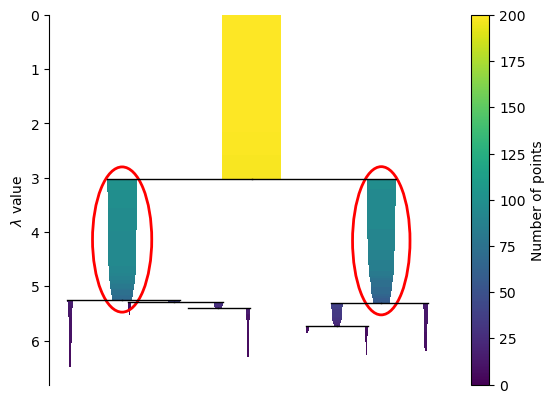

In [28]:
hdb.condensed_tree_.plot(select_clusters=True)